##### Copyright 2018 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Basic classification: Classify images of clothing

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This guide trains a neural network model to classify images of clothing, like sneakers and shirts. It's okay if you don't understand all the details; this is a fast-paced overview of a complete TensorFlow program with the details explained as you go.

This guide uses [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow.

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math

print(tf.__version__)

2.3.0


## Import the Fashion MNIST dataset

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and load the Fashion MNIST data directly from TensorFlow:

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [ ]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [ ]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [ ]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [ ]:
len(test_labels)

10000

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

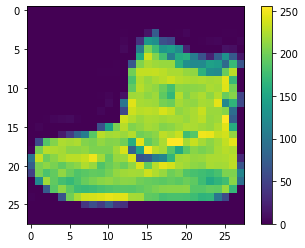

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

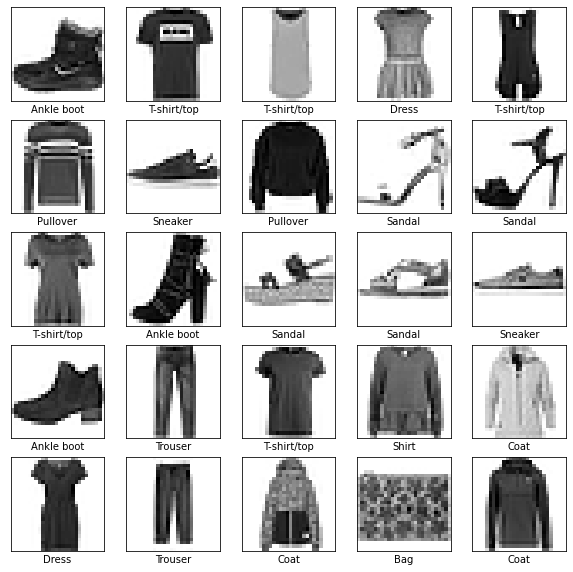

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Splitting Images - Training and Validation

In [ ]:
train_images, validation_images, train_labels, validation_labels = train_test_split(train_images, train_labels, test_size=10000)

In [ ]:
print(train_images.shape)
print(validation_images.shape)
print(train_labels.shape)
print(validation_labels.shape)

(50000, 28, 28)
(10000, 28, 28)
(50000,)
(10000,)


## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers

The basic building block of a neural network is the *layer*. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


### Feed the model

To start training,  call the `model.fit` method—so called because it "fits" the model to the training data:

In [ ]:
model.fit(train_images, train_labels, validation_data=(validation_images, validation_labels), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3547 - accuracy: 0.8701 - val_loss: 0.3857 - val_accuracy: 0.8600
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3377 - accuracy: 0.8778 - val_loss: 0.4075 - val_accuracy: 0.8577
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3307 - accuracy: 0.8796 - val_loss: 0.4255 - val_accuracy: 0.8512
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3189 - accuracy: 0.8828 - val_loss: 0.3853 - val_accuracy: 0.8600
Epoch 5/10
1563/1563 [==============================] - 5s 4ms/step - loss: 0.3127 - accuracy: 0.8866 - val_loss: 0.3786 - val_accuracy: 0.8691
Epoch 6/10
1563/1563 [==============================] - 5s 4ms/step - loss: 0.3104 - accuracy: 0.8874 - val_loss: 0.3635 - val_accuracy: 0.8649
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2963 - accuracy: 0.8907 - val_loss: 0.3638 - val_accuracy:

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

## Plotting Learning Curves - Illustrating Loss

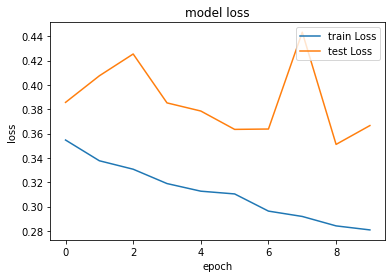

In [ ]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train Loss', 'test Loss'], loc='upper right')
plt.show()

**NOTE**:
Yes, the model overfits as the training loss illustrates a gradual, steady decline with the increase in number of epochs, while the validation loss is substantially larger than the training loss. The training loss keeps decreasing towards the last epochs, but the validation loss constitutes an unstable nature and hits sharp upward and downward peaks.

##Batch Normalization

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5337 - accuracy: 0.8125 - val_loss: 0.4393 - val_accuracy: 0.8449
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4163 - accuracy: 0.8524 - val_loss: 0.4012 - val_accuracy: 0.8574
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3818 - accuracy: 0.8634 - val_loss: 0.3794 - val_accuracy: 0.8632
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3584 - accuracy: 0.8693 - val_loss: 0.3587 - val_accuracy: 0.8698
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3407 - accuracy: 0.8769 - val_loss: 0.3617 - val_accuracy: 0.8705
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3222 - accuracy: 0.8836 - val_loss: 0.3466 - val_accuracy: 0.8765
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3121 - accuracy: 0.8863 - val_loss: 0.3491 - val_accuracy:

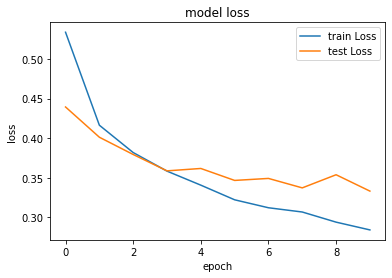

In [ ]:
# Model Definition
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10)
])

# The Learning Rate Scheduler defined:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-3, decay_steps=1500, decay_rate=0.9)

# Stochastic Gradient Descent Optimizer defined:
opt = tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.98, nesterov=True)

model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Model Fitting
model.fit(train_images, train_labels, validation_data=(validation_images, validation_labels), epochs=10)

# Plotting Losses:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train Loss', 'test Loss'], loc='upper right')
plt.show()


**NOTE**: Yes. Learning has substantially improved from our previous illustration. The validation loss is very different in it's demeanor in contrast to our previous example, it does not have heightened peaks in loss. Other techniques are shown as below.

## Learning Rate Scheduling

Epoch 1/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2792 - accuracy: 0.8986 - val_loss: 0.3293 - val_accuracy: 0.8855
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2690 - accuracy: 0.9025 - val_loss: 0.3127 - val_accuracy: 0.8878
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2627 - accuracy: 0.9039 - val_loss: 0.3224 - val_accuracy: 0.8856
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2570 - accuracy: 0.9053 - val_loss: 0.3167 - val_accuracy: 0.8862
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2490 - accuracy: 0.9094 - val_loss: 0.3146 - val_accuracy: 0.8894
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2481 - accuracy: 0.9093 - val_loss: 0.3188 - val_accuracy: 0.8875
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2442 - accuracy: 0.9107 - val_loss: 0.3096 - val_accuracy:

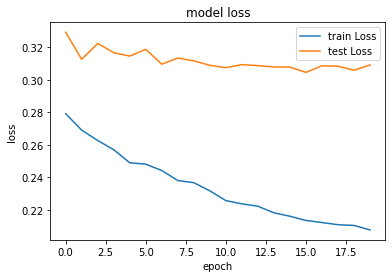

In [ ]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-3, decay_steps=1000, decay_rate=0.9)

model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Model Fitting
model.fit(train_images, train_labels, validation_data=(validation_images, validation_labels), epochs=20)

# Plotting Losses
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train Loss', 'test Loss'], loc='upper right')
plt.show()

**NOTE**: This model overfits, even with an exponential learning rate of 0.001. The validation loss trend is not as extreme as it was in our first illustration, but results with Batch Normalization, LRS and SGD optimizer amalgamated together can be deemed better.

## Stochastic Gradient Descent Optimization

Epoch 1/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3192 - accuracy: 0.8821 - val_loss: 0.3804 - val_accuracy: 0.8603
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2992 - accuracy: 0.8910 - val_loss: 0.3548 - val_accuracy: 0.8738
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2854 - accuracy: 0.8950 - val_loss: 0.3307 - val_accuracy: 0.8834
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2656 - accuracy: 0.9023 - val_loss: 0.3324 - val_accuracy: 0.8812
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2484 - accuracy: 0.9081 - val_loss: 0.3285 - val_accuracy: 0.8852
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2380 - accuracy: 0.9130 - val_loss: 0.3284 - val_accuracy: 0.8852
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2287 - accuracy: 0.9163 - val_loss: 0.3061 - val_accuracy:

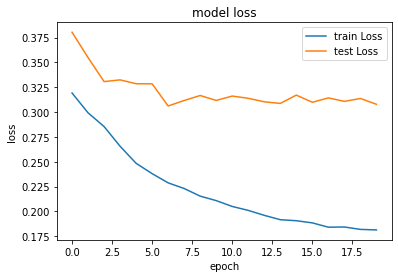

In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.98, nesterov=True)

model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Model Fitting
model.fit(train_images, train_labels, validation_data=(validation_images, validation_labels), epochs=20)

# Plotting Losses
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train Loss', 'test Loss'], loc='upper right')
plt.show()

**NOTE**: From the graph above, we once again identify peak increase and decrease in validation loss which is not ideal. Therefore we can deduce that the Batch Normalization technique helped improved model learning much better than above used SGD Optimization or LRS. 

## Model Regularization and the introduction of additional layers

Epoch 1/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8225 - accuracy: 0.7144 - val_loss: 0.5146 - val_accuracy: 0.8294
Epoch 2/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5507 - accuracy: 0.8219 - val_loss: 0.4682 - val_accuracy: 0.8455
Epoch 3/20
1563/1563 [==============================] - 5s 4ms/step - loss: 0.4971 - accuracy: 0.8393 - val_loss: 0.4336 - val_accuracy: 0.8586
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4710 - accuracy: 0.8490 - val_loss: 0.4213 - val_accuracy: 0.8653
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4458 - accuracy: 0.8574 - val_loss: 0.4120 - val_accuracy: 0.8690
Epoch 6/20
1563/1563 [==============================] - 5s 4ms/step - loss: 0.4367 - accuracy: 0.8619 - val_loss: 0.4048 - val_accuracy: 0.8684
Epoch 7/20
1563/1563 [==============================] - 5s 4ms/step - loss: 0.4195 - accuracy: 0.8674 - val_loss: 0.3935 - val_accuracy:

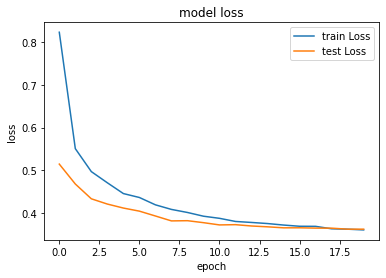

In [ ]:
# Early Stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, min_delta=1e-4, restore_best_weights=True)

# Model Definition
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

# Learning Rate Scheduler
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-3, decay_steps=1000, decay_rate=0.9)

# Stochastic Gradient Descent Optimization
opt = tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.98, nesterov=True)

# Model Compilation
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Model Fitting
model.fit(train_images, train_labels, validation_data=(validation_images, validation_labels), epochs=20, callbacks= callback)

# Plotting Losses
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train Loss', 'test Loss'], loc='upper right')
plt.show()


**NOTE**: The graph above depicts that the training loss has decreased as we increase the number of epochs, as does the testing loss, signifying successful regularization. Dropout and Early Stopping was used to regularize the model.

##Hyper-parameter Tuning

In [ ]:
!pip install -q -U keras-tuner

     |████████████████████████████████| 61kB 3.7MB/s 


In [ ]:
import kerastuner as kt

##Model Definition

In [ ]:
def model_builder(hp):

  # Hyper-parameter placeholders:
  hp_units = hp.Int('units_layer', min_value = 128, max_value = 512, step = 64)
  hp_learningrate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
  hp_dropout_rate = hp.Float('dropout_layer', min_value = 0.2, max_value = 0.5, step = 0.1)
  hp_activation = hp.Choice('activation', values=('relu', 'sigmoid', 'tanh'))

  
  model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),
      tf.keras.layers.Dense(hp_units, activation= hp_activation, kernel_initializer=tf.keras.initializers.he_normal(seed=1), kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
      tf.keras.layers.Dropout(hp_dropout_rate),
      tf.keras.layers.Dense(hp_units, activation= hp_activation, kernel_initializer=tf.keras.initializers.he_normal(seed=1), kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
      tf.keras.layers.Dropout(hp_dropout_rate),
      tf.keras.layers.Dense(hp_units, activation= hp_activation, kernel_initializer=tf.keras.initializers.he_normal(seed=1), kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
      tf.keras.layers.Dropout(hp_dropout_rate),
      tf.keras.layers.Dense(10)
  ])

  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate= hp_learningrate, decay_steps=1000, decay_rate=0.9)

  opt = tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.98, nesterov=True)

  model.compile(optimizer=opt,
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
  
  return model


##Introducing the Tuner

In [ ]:
# Initialization
tuner = kt.Hyperband(model_builder,
                     objective = 'val_accuracy', 
                     max_epochs = 30,
                     factor = 3,
                     directory = 'kerastuner',
                     project_name = 'FashionMNIST')

In [ ]:
# Early Stopping
callback = tf.keras.callbacks.EarlyStopping(monitor= 'val_accuracy', patience=5, min_delta=1e-4, restore_best_weights=True)

# Beginning Tuning
tuner.search(train_images, train_labels,
            validation_data = (validation_images, validation_labels),
            epochs = 30,
            callbacks=[callback],
            verbose = 1)

Epoch 1/2
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8943 - accuracy: 0.7591 - val_loss: 0.6647 - val_accuracy: 0.8383
Epoch 2/2
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7186 - accuracy: 0.8202 - val_loss: 0.6251 - val_accuracy: 0.8492


Epoch 1/2
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9520 - accuracy: 0.7077 - val_loss: 0.6312 - val_accuracy: 0.8255
Epoch 2/2
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7171 - accuracy: 0.7960 - val_loss: 0.5784 - val_accuracy: 0.8434


Epoch 1/2
1563/1563 [==============================] - 7s 4ms/step - loss: 2.4952 - accuracy: 0.1080 - val_loss: 2.3750 - val_accuracy: 0.1920
Epoch 2/2
1563/1563 [==============================] - 7s 5ms/step - loss: 2.4116 - accuracy: 0.1339 - val_loss: 2.3045 - val_accuracy: 0.3209


Epoch 1/2
1563/1563 [==============================] - 7s 5ms/step - loss: 2.6648 - accuracy: 0.1280 - val_loss: 2.4217 - val_accuracy: 0.2035
Epoch 2/2
1563/1563 [==============================] - 7s 4ms/step - loss: 2.2673 - accuracy: 0.2458 - val_loss: 1.8498 - val_accuracy: 0.3870


Epoch 1/2
1563/1563 [==============================] - 7s 4ms/step - loss: 2.6462 - accuracy: 0.1191 - val_loss: 2.4592 - val_accuracy: 0.2780
Epoch 2/2
1563/1563 [==============================] - 7s 4ms/step - loss: 2.3877 - accuracy: 0.1998 - val_loss: 2.0337 - val_accuracy: 0.4937


Epoch 1/2
1563/1563 [==============================] - 7s 4ms/step - loss: 2.5905 - accuracy: 0.1058 - val_loss: 2.4239 - val_accuracy: 0.2106
Epoch 2/2
1563/1563 [==============================] - 7s 4ms/step - loss: 2.5058 - accuracy: 0.1177 - val_loss: 2.3878 - val_accuracy: 0.2634


Epoch 1/2
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2132 - accuracy: 0.6175 - val_loss: 0.7403 - val_accuracy: 0.7884
Epoch 2/2
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8405 - accuracy: 0.7508 - val_loss: 0.6882 - val_accuracy: 0.8086


Epoch 1/2
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0800 - accuracy: 0.6787 - val_loss: 0.8771 - val_accuracy: 0.7521
Epoch 2/2
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9145 - accuracy: 0.7372 - val_loss: 0.7674 - val_accuracy: 0.7942


Epoch 1/2
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9326 - accuracy: 0.7600 - val_loss: 0.7345 - val_accuracy: 0.8162
Epoch 2/2
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7861 - accuracy: 0.8060 - val_loss: 0.6810 - val_accuracy: 0.8387


Epoch 1/2
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2489 - accuracy: 0.6694 - val_loss: 0.8758 - val_accuracy: 0.8053
Epoch 2/2
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9168 - accuracy: 0.7860 - val_loss: 0.8067 - val_accuracy: 0.8242


Epoch 1/2
1563/1563 [==============================] - 7s 4ms/step - loss: 2.3309 - accuracy: 0.1957 - val_loss: 1.6150 - val_accuracy: 0.4827
Epoch 2/2
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5443 - accuracy: 0.4506 - val_loss: 1.2507 - val_accuracy: 0.5918


Epoch 1/2
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9764 - accuracy: 0.7351 - val_loss: 0.7184 - val_accuracy: 0.8319
Epoch 2/2
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7819 - accuracy: 0.8056 - val_loss: 0.6921 - val_accuracy: 0.8407


Epoch 1/2
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1993 - accuracy: 0.6684 - val_loss: 0.9615 - val_accuracy: 0.7266
Epoch 2/2
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0384 - accuracy: 0.7132 - val_loss: 0.8806 - val_accuracy: 0.7894


Epoch 1/2
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8893 - accuracy: 0.7640 - val_loss: 0.6542 - val_accuracy: 0.8467
Epoch 2/2
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6991 - accuracy: 0.8271 - val_loss: 0.6094 - val_accuracy: 0.8577


Epoch 1/2
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3452 - accuracy: 0.6128 - val_loss: 0.8540 - val_accuracy: 0.7917
Epoch 2/2
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9591 - accuracy: 0.7500 - val_loss: 0.7976 - val_accuracy: 0.8128


Epoch 1/2
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9335 - accuracy: 0.7071 - val_loss: 0.6124 - val_accuracy: 0.8239
Epoch 2/2
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6444 - accuracy: 0.8142 - val_loss: 0.5496 - val_accuracy: 0.8429


Epoch 1/2
1563/1563 [==============================] - 8s 5ms/step - loss: 2.1613 - accuracy: 0.2252 - val_loss: 1.4177 - val_accuracy: 0.5466
Epoch 2/2
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3740 - accuracy: 0.4978 - val_loss: 1.1159 - val_accuracy: 0.6131


Epoch 1/2
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1599 - accuracy: 0.7236 - val_loss: 0.9891 - val_accuracy: 0.7823
Epoch 2/2
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0712 - accuracy: 0.7712 - val_loss: 0.8376 - val_accuracy: 0.8261


Epoch 1/2
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9469 - accuracy: 0.6982 - val_loss: 0.6234 - val_accuracy: 0.8154
Epoch 2/2
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6945 - accuracy: 0.7936 - val_loss: 0.5802 - val_accuracy: 0.8313


Epoch 1/2
1563/1563 [==============================] - 7s 4ms/step - loss: 1.9813 - accuracy: 0.2655 - val_loss: 1.2302 - val_accuracy: 0.5719
Epoch 2/2
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2838 - accuracy: 0.5207 - val_loss: 1.0330 - val_accuracy: 0.6329


Epoch 1/2
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8279 - accuracy: 0.7601 - val_loss: 0.6366 - val_accuracy: 0.8323
Epoch 2/2
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7224 - accuracy: 0.8062 - val_loss: 0.7272 - val_accuracy: 0.8127


Epoch 1/2
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9813 - accuracy: 0.7430 - val_loss: 0.7633 - val_accuracy: 0.8290
Epoch 2/2
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7945 - accuracy: 0.8101 - val_loss: 0.7036 - val_accuracy: 0.8472


Epoch 1/2
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4499 - accuracy: 0.5647 - val_loss: 0.9131 - val_accuracy: 0.7403
Epoch 2/2
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0027 - accuracy: 0.7243 - val_loss: 0.8038 - val_accuracy: 0.7881


Epoch 1/2
1563/1563 [==============================] - 7s 5ms/step - loss: 2.7041 - accuracy: 0.1061 - val_loss: 2.5294 - val_accuracy: 0.1502
Epoch 2/2
1563/1563 [==============================] - 7s 4ms/step - loss: 2.6079 - accuracy: 0.1262 - val_loss: 2.4813 - val_accuracy: 0.4242


Epoch 1/2
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7166 - accuracy: 0.7834 - val_loss: 0.5648 - val_accuracy: 0.8417
Epoch 2/2
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5702 - accuracy: 0.8357 - val_loss: 0.5375 - val_accuracy: 0.8431


Epoch 1/2
1563/1563 [==============================] - 7s 4ms/step - loss: 2.4139 - accuracy: 0.1707 - val_loss: 1.7976 - val_accuracy: 0.4442
Epoch 2/2
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6731 - accuracy: 0.3958 - val_loss: 1.3209 - val_accuracy: 0.5587


Epoch 1/2
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8349 - accuracy: 0.7377 - val_loss: 0.6064 - val_accuracy: 0.8128
Epoch 2/2
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6422 - accuracy: 0.8087 - val_loss: 0.5399 - val_accuracy: 0.8434


Epoch 1/2
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9146 - accuracy: 0.7683 - val_loss: 0.7814 - val_accuracy: 0.8133
Epoch 2/2
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7634 - accuracy: 0.8199 - val_loss: 0.6800 - val_accuracy: 0.8503


Epoch 1/2
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8449 - accuracy: 0.3878 - val_loss: 1.1646 - val_accuracy: 0.6601
Epoch 2/2
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1558 - accuracy: 0.6498 - val_loss: 0.9551 - val_accuracy: 0.7395


Epoch 1/2
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9992 - accuracy: 0.7203 - val_loss: 0.7313 - val_accuracy: 0.8196
Epoch 2/2
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7742 - accuracy: 0.8034 - val_loss: 0.6836 - val_accuracy: 0.8384


Epoch 1/2
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0323 - accuracy: 0.7357 - val_loss: 0.7862 - val_accuracy: 0.8291
Epoch 2/2
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8316 - accuracy: 0.8106 - val_loss: 0.7506 - val_accuracy: 0.8424


Epoch 1/2
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9568 - accuracy: 0.7311 - val_loss: 0.7265 - val_accuracy: 0.8199
Epoch 2/2
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7950 - accuracy: 0.7847 - val_loss: 0.6876 - val_accuracy: 0.8207


Epoch 1/2
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3454 - accuracy: 0.5815 - val_loss: 0.8514 - val_accuracy: 0.7778
Epoch 2/2
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8860 - accuracy: 0.7629 - val_loss: 0.7664 - val_accuracy: 0.8076


Epoch 1/2
1563/1563 [==============================] - 7s 4ms/step - loss: 2.5721 - accuracy: 0.1283 - val_loss: 2.3249 - val_accuracy: 0.4265
Epoch 2/2
1563/1563 [==============================] - 7s 4ms/step - loss: 2.0887 - accuracy: 0.2781 - val_loss: 1.6519 - val_accuracy: 0.5528


Epoch 3/4
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8960 - accuracy: 0.7602 - val_loss: 0.6609 - val_accuracy: 0.8394
Epoch 4/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6962 - accuracy: 0.8280 - val_loss: 0.5998 - val_accuracy: 0.8621


Epoch 3/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9182 - accuracy: 0.7681 - val_loss: 0.7542 - val_accuracy: 0.8284
Epoch 4/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7600 - accuracy: 0.8234 - val_loss: 0.6672 - val_accuracy: 0.8561


Epoch 3/4
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9038 - accuracy: 0.7565 - val_loss: 0.6588 - val_accuracy: 0.8436
Epoch 4/4
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7130 - accuracy: 0.8192 - val_loss: 0.6185 - val_accuracy: 0.8549


Epoch 3/4
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9744 - accuracy: 0.7463 - val_loss: 0.7696 - val_accuracy: 0.8246
Epoch 4/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7947 - accuracy: 0.8102 - val_loss: 0.7061 - val_accuracy: 0.8447


Epoch 3/4
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9450 - accuracy: 0.7095 - val_loss: 0.6315 - val_accuracy: 0.8260
Epoch 4/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7075 - accuracy: 0.7998 - val_loss: 0.5737 - val_accuracy: 0.8472


Epoch 3/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8344 - accuracy: 0.7379 - val_loss: 0.6034 - val_accuracy: 0.8206
Epoch 4/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6467 - accuracy: 0.8105 - val_loss: 0.5323 - val_accuracy: 0.8503


Epoch 3/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7087 - accuracy: 0.7874 - val_loss: 0.5444 - val_accuracy: 0.8447
Epoch 4/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5685 - accuracy: 0.8379 - val_loss: 0.5142 - val_accuracy: 0.8558


Epoch 3/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9473 - accuracy: 0.7007 - val_loss: 0.6220 - val_accuracy: 0.8131
Epoch 4/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6446 - accuracy: 0.8121 - val_loss: 0.5444 - val_accuracy: 0.8464


Epoch 3/4
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0338 - accuracy: 0.7369 - val_loss: 0.7848 - val_accuracy: 0.8283
Epoch 4/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8302 - accuracy: 0.8115 - val_loss: 0.7483 - val_accuracy: 0.8398


Epoch 3/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9713 - accuracy: 0.7363 - val_loss: 0.7637 - val_accuracy: 0.8154
Epoch 4/4
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7808 - accuracy: 0.8075 - val_loss: 0.6618 - val_accuracy: 0.8489


Epoch 3/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9241 - accuracy: 0.7607 - val_loss: 0.7605 - val_accuracy: 0.8261
Epoch 4/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7653 - accuracy: 0.8139 - val_loss: 0.6784 - val_accuracy: 0.8459


Epoch 3/4
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0028 - accuracy: 0.7203 - val_loss: 0.7118 - val_accuracy: 0.8263
Epoch 4/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7742 - accuracy: 0.8025 - val_loss: 0.6962 - val_accuracy: 0.8331


Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8999 - accuracy: 0.7585 - val_loss: 0.6500 - val_accuracy: 0.8455
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7016 - accuracy: 0.8274 - val_loss: 0.6067 - val_accuracy: 0.8567
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6522 - accuracy: 0.8417 - val_loss: 0.5949 - val_accuracy: 0.8619
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6125 - accuracy: 0.8545 - val_loss: 0.5813 - val_accuracy: 0.8622
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5846 - accuracy: 0.8614 - val_loss: 0.5452 - val_accuracy: 0.8717
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5636 - accuracy: 0.8686 - val_loss: 0.5393 - val_accuracy: 0.8709


Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9184 - accuracy: 0.7663 - val_loss: 0.7224 - val_accuracy: 0.8403
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7564 - accuracy: 0.8239 - val_loss: 0.6703 - val_accuracy: 0.8514
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7052 - accuracy: 0.8395 - val_loss: 0.6575 - val_accuracy: 0.8550
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6736 - accuracy: 0.8455 - val_loss: 0.6235 - val_accuracy: 0.8617
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6431 - accuracy: 0.8541 - val_loss: 0.6204 - val_accuracy: 0.8614
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6195 - accuracy: 0.8591 - val_loss: 0.6040 - val_accuracy: 0.8657


Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7175 - accuracy: 0.7840 - val_loss: 0.5806 - val_accuracy: 0.8375
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5689 - accuracy: 0.8364 - val_loss: 0.5324 - val_accuracy: 0.8513
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5296 - accuracy: 0.8506 - val_loss: 0.5091 - val_accuracy: 0.8526
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4984 - accuracy: 0.8590 - val_loss: 0.4729 - val_accuracy: 0.8670
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4819 - accuracy: 0.8629 - val_loss: 0.4621 - val_accuracy: 0.8683
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4646 - accuracy: 0.8668 - val_loss: 0.4593 - val_accuracy: 0.8710


Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8990 - accuracy: 0.7553 - val_loss: 0.6609 - val_accuracy: 0.8431
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7092 - accuracy: 0.8232 - val_loss: 0.6250 - val_accuracy: 0.8428
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6590 - accuracy: 0.8366 - val_loss: 0.5924 - val_accuracy: 0.8613
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6205 - accuracy: 0.8473 - val_loss: 0.5648 - val_accuracy: 0.8609
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5895 - accuracy: 0.8564 - val_loss: 0.5426 - val_accuracy: 0.8693
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5636 - accuracy: 0.8634 - val_loss: 0.5298 - val_accuracy: 0.8739


Epoch 11/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8938 - accuracy: 0.7614 - val_loss: 0.6662 - val_accuracy: 0.8414
Epoch 12/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7070 - accuracy: 0.8241 - val_loss: 0.6259 - val_accuracy: 0.8475
Epoch 13/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6587 - accuracy: 0.8350 - val_loss: 0.5973 - val_accuracy: 0.8517
Epoch 14/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6188 - accuracy: 0.8486 - val_loss: 0.5682 - val_accuracy: 0.8599
Epoch 15/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5860 - accuracy: 0.8579 - val_loss: 0.5482 - val_accuracy: 0.8654
Epoch 16/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5627 - accuracy: 0.8649 - val_loss: 0.5329 - val_accuracy: 0.8722
Epoch 17/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5403 - accuracy: 0.8690 - val_loss: 0.5200 - val_ac

Epoch 11/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8899 - accuracy: 0.7602 - val_loss: 0.6675 - val_accuracy: 0.8392
Epoch 12/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6994 - accuracy: 0.8281 - val_loss: 0.6117 - val_accuracy: 0.8543
Epoch 13/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6468 - accuracy: 0.8427 - val_loss: 0.5773 - val_accuracy: 0.8662
Epoch 14/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6060 - accuracy: 0.8544 - val_loss: 0.5645 - val_accuracy: 0.8654
Epoch 15/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5808 - accuracy: 0.8649 - val_loss: 0.5474 - val_accuracy: 0.8727
Epoch 16/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5591 - accuracy: 0.8687 - val_loss: 0.5300 - val_accuracy: 0.8756
Epoch 17/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5463 - accuracy: 0.8722 - val_loss: 0.5237 - val_ac

Epoch 1/4
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2953 - accuracy: 0.5861 - val_loss: 0.7645 - val_accuracy: 0.7857
Epoch 2/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8582 - accuracy: 0.7445 - val_loss: 0.6647 - val_accuracy: 0.8140
Epoch 3/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7680 - accuracy: 0.7821 - val_loss: 0.6197 - val_accuracy: 0.8322
Epoch 4/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7221 - accuracy: 0.8002 - val_loss: 0.5965 - val_accuracy: 0.8411


Epoch 1/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7620 - accuracy: 0.7663 - val_loss: 0.5540 - val_accuracy: 0.8450
Epoch 2/4
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5994 - accuracy: 0.8252 - val_loss: 0.5220 - val_accuracy: 0.8471
Epoch 3/4
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5492 - accuracy: 0.8424 - val_loss: 0.4823 - val_accuracy: 0.8622
Epoch 4/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5099 - accuracy: 0.8536 - val_loss: 0.4708 - val_accuracy: 0.8586


Epoch 1/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7727 - accuracy: 0.7626 - val_loss: 0.5942 - val_accuracy: 0.8327
Epoch 2/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6063 - accuracy: 0.8254 - val_loss: 0.5309 - val_accuracy: 0.8509
Epoch 3/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5658 - accuracy: 0.8382 - val_loss: 0.5083 - val_accuracy: 0.8570
Epoch 4/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5377 - accuracy: 0.8472 - val_loss: 0.5255 - val_accuracy: 0.8510


Epoch 1/4
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7651 - accuracy: 0.4119 - val_loss: 1.1103 - val_accuracy: 0.6703
Epoch 2/4
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1160 - accuracy: 0.6681 - val_loss: 0.8922 - val_accuracy: 0.7571
Epoch 3/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9809 - accuracy: 0.7222 - val_loss: 0.8397 - val_accuracy: 0.7819
Epoch 4/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9267 - accuracy: 0.7455 - val_loss: 0.8022 - val_accuracy: 0.7915


Epoch 1/4
1563/1563 [==============================] - 7s 4ms/step - loss: 2.5718 - accuracy: 0.1160 - val_loss: 2.4656 - val_accuracy: 0.3917
Epoch 2/4
1563/1563 [==============================] - 7s 4ms/step - loss: 2.4686 - accuracy: 0.1677 - val_loss: 2.3347 - val_accuracy: 0.5383
Epoch 3/4
1563/1563 [==============================] - 7s 4ms/step - loss: 2.2834 - accuracy: 0.2562 - val_loss: 2.0659 - val_accuracy: 0.4218
Epoch 4/4
1563/1563 [==============================] - 7s 4ms/step - loss: 2.0073 - accuracy: 0.3382 - val_loss: 1.7973 - val_accuracy: 0.5420


Epoch 1/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8927 - accuracy: 0.7657 - val_loss: 0.7015 - val_accuracy: 0.8341
Epoch 2/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7410 - accuracy: 0.8083 - val_loss: 0.6482 - val_accuracy: 0.8381
Epoch 3/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6724 - accuracy: 0.8265 - val_loss: 0.5771 - val_accuracy: 0.8559
Epoch 4/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6134 - accuracy: 0.8376 - val_loss: 0.5648 - val_accuracy: 0.8558


Epoch 1/4
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8808 - accuracy: 0.3351 - val_loss: 1.2043 - val_accuracy: 0.6013
Epoch 2/4
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1342 - accuracy: 0.6189 - val_loss: 0.9376 - val_accuracy: 0.7253
Epoch 3/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9661 - accuracy: 0.6926 - val_loss: 0.8272 - val_accuracy: 0.7480
Epoch 4/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8890 - accuracy: 0.7230 - val_loss: 0.7839 - val_accuracy: 0.7636


Epoch 1/4
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0607 - accuracy: 0.6518 - val_loss: 0.6622 - val_accuracy: 0.7961
Epoch 2/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7231 - accuracy: 0.7812 - val_loss: 0.5832 - val_accuracy: 0.8281
Epoch 3/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6523 - accuracy: 0.8087 - val_loss: 0.5491 - val_accuracy: 0.8442
Epoch 4/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6157 - accuracy: 0.8230 - val_loss: 0.5307 - val_accuracy: 0.8495


Epoch 1/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8930 - accuracy: 0.7349 - val_loss: 0.6096 - val_accuracy: 0.8339
Epoch 2/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6391 - accuracy: 0.8264 - val_loss: 0.5686 - val_accuracy: 0.8462
Epoch 3/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5877 - accuracy: 0.8428 - val_loss: 0.5371 - val_accuracy: 0.8594
Epoch 4/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5626 - accuracy: 0.8513 - val_loss: 0.5206 - val_accuracy: 0.8626


Epoch 1/4
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0427 - accuracy: 0.6907 - val_loss: 0.7119 - val_accuracy: 0.8126
Epoch 2/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7708 - accuracy: 0.7932 - val_loss: 0.6701 - val_accuracy: 0.8281
Epoch 3/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7265 - accuracy: 0.8087 - val_loss: 0.6460 - val_accuracy: 0.8368
Epoch 4/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7035 - accuracy: 0.8175 - val_loss: 0.6357 - val_accuracy: 0.8417


Epoch 1/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8946 - accuracy: 0.7866 - val_loss: 0.7083 - val_accuracy: 0.8519
Epoch 2/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7290 - accuracy: 0.8393 - val_loss: 0.6541 - val_accuracy: 0.8585
Epoch 3/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6711 - accuracy: 0.8524 - val_loss: 0.6325 - val_accuracy: 0.8640
Epoch 4/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6254 - accuracy: 0.8632 - val_loss: 0.5869 - val_accuracy: 0.8737


Epoch 1/4
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7392 - accuracy: 0.4294 - val_loss: 0.9578 - val_accuracy: 0.6973
Epoch 2/4
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1238 - accuracy: 0.6359 - val_loss: 0.8267 - val_accuracy: 0.7472
Epoch 3/4
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0001 - accuracy: 0.6876 - val_loss: 0.7685 - val_accuracy: 0.7716
Epoch 4/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9296 - accuracy: 0.7138 - val_loss: 0.7308 - val_accuracy: 0.7865


Epoch 1/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9292 - accuracy: 0.7156 - val_loss: 0.6503 - val_accuracy: 0.8220
Epoch 2/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7005 - accuracy: 0.8031 - val_loss: 0.6075 - val_accuracy: 0.8382
Epoch 3/4
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6568 - accuracy: 0.8203 - val_loss: 0.5869 - val_accuracy: 0.8448
Epoch 4/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6329 - accuracy: 0.8275 - val_loss: 0.5800 - val_accuracy: 0.8506


Epoch 1/4
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3309 - accuracy: 0.6055 - val_loss: 0.8319 - val_accuracy: 0.7824
Epoch 2/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9349 - accuracy: 0.7451 - val_loss: 0.7636 - val_accuracy: 0.8124
Epoch 3/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8690 - accuracy: 0.7694 - val_loss: 0.7396 - val_accuracy: 0.8201
Epoch 4/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8304 - accuracy: 0.7845 - val_loss: 0.7293 - val_accuracy: 0.8247


Epoch 1/4
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1380 - accuracy: 0.6635 - val_loss: 0.7391 - val_accuracy: 0.8100
Epoch 2/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7929 - accuracy: 0.7867 - val_loss: 0.6627 - val_accuracy: 0.8309
Epoch 3/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7208 - accuracy: 0.8124 - val_loss: 0.6284 - val_accuracy: 0.8432
Epoch 4/4
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6905 - accuracy: 0.8240 - val_loss: 0.6037 - val_accuracy: 0.8503


Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8942 - accuracy: 0.7853 - val_loss: 0.7208 - val_accuracy: 0.8477
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7293 - accuracy: 0.8395 - val_loss: 0.6536 - val_accuracy: 0.8588
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6698 - accuracy: 0.8546 - val_loss: 0.6464 - val_accuracy: 0.8586
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6265 - accuracy: 0.8646 - val_loss: 0.5986 - val_accuracy: 0.8742
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5934 - accuracy: 0.8720 - val_loss: 0.5652 - val_accuracy: 0.8806
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5658 - accuracy: 0.8789 - val_loss: 0.5556 - val_accuracy: 0.8789


Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8932 - accuracy: 0.7368 - val_loss: 0.6059 - val_accuracy: 0.8363
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6362 - accuracy: 0.8275 - val_loss: 0.5710 - val_accuracy: 0.8481
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5884 - accuracy: 0.8439 - val_loss: 0.5359 - val_accuracy: 0.8606
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5608 - accuracy: 0.8521 - val_loss: 0.5169 - val_accuracy: 0.8688
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5390 - accuracy: 0.8598 - val_loss: 0.5054 - val_accuracy: 0.8684
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5253 - accuracy: 0.8647 - val_loss: 0.4970 - val_accuracy: 0.8734


Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7690 - accuracy: 0.7653 - val_loss: 0.5849 - val_accuracy: 0.8262
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6091 - accuracy: 0.8227 - val_loss: 0.5174 - val_accuracy: 0.8494
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5571 - accuracy: 0.8388 - val_loss: 0.4984 - val_accuracy: 0.8536
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5196 - accuracy: 0.8500 - val_loss: 0.4996 - val_accuracy: 0.8551
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4965 - accuracy: 0.8566 - val_loss: 0.4606 - val_accuracy: 0.8684
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4724 - accuracy: 0.8639 - val_loss: 0.4540 - val_accuracy: 0.8688


Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7769 - accuracy: 0.7628 - val_loss: 0.5870 - val_accuracy: 0.8339
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6142 - accuracy: 0.8224 - val_loss: 0.5407 - val_accuracy: 0.8482
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5699 - accuracy: 0.8362 - val_loss: 0.5132 - val_accuracy: 0.8555
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5440 - accuracy: 0.8439 - val_loss: 0.4920 - val_accuracy: 0.8633
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5189 - accuracy: 0.8517 - val_loss: 0.4959 - val_accuracy: 0.8559
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5036 - accuracy: 0.8548 - val_loss: 0.4682 - val_accuracy: 0.8682


Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8982 - accuracy: 0.7647 - val_loss: 0.7212 - val_accuracy: 0.8305
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7444 - accuracy: 0.8115 - val_loss: 0.6395 - val_accuracy: 0.8517
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6799 - accuracy: 0.8238 - val_loss: 0.6071 - val_accuracy: 0.8435
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6221 - accuracy: 0.8372 - val_loss: 0.5758 - val_accuracy: 0.8501
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5756 - accuracy: 0.8510 - val_loss: 0.5159 - val_accuracy: 0.8690
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5450 - accuracy: 0.8562 - val_loss: 0.5096 - val_accuracy: 0.8661


Epoch 11/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8891 - accuracy: 0.7905 - val_loss: 0.7166 - val_accuracy: 0.8450
Epoch 12/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7251 - accuracy: 0.8404 - val_loss: 0.6757 - val_accuracy: 0.8568
Epoch 13/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6726 - accuracy: 0.8528 - val_loss: 0.6288 - val_accuracy: 0.8643
Epoch 14/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6301 - accuracy: 0.8624 - val_loss: 0.6076 - val_accuracy: 0.8627
Epoch 15/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5955 - accuracy: 0.8693 - val_loss: 0.5727 - val_accuracy: 0.8769
Epoch 16/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5639 - accuracy: 0.8786 - val_loss: 0.5650 - val_accuracy: 0.8743
Epoch 17/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5437 - accuracy: 0.8823 - val_loss: 0.5363 - val_ac

Epoch 11/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8911 - accuracy: 0.7367 - val_loss: 0.6259 - val_accuracy: 0.8267
Epoch 12/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6398 - accuracy: 0.8257 - val_loss: 0.5651 - val_accuracy: 0.8493
Epoch 13/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5923 - accuracy: 0.8425 - val_loss: 0.5389 - val_accuracy: 0.8578
Epoch 14/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5632 - accuracy: 0.8502 - val_loss: 0.5227 - val_accuracy: 0.8657
Epoch 15/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5415 - accuracy: 0.8597 - val_loss: 0.5115 - val_accuracy: 0.8677
Epoch 16/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5268 - accuracy: 0.8635 - val_loss: 0.4978 - val_accuracy: 0.8711
Epoch 17/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5155 - accuracy: 0.8668 - val_loss: 0.4911 - val_ac

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9168 - accuracy: 0.6963 - val_loss: 0.5888 - val_accuracy: 0.8131
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6506 - accuracy: 0.7962 - val_loss: 0.5702 - val_accuracy: 0.8239
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6080 - accuracy: 0.8126 - val_loss: 0.5329 - val_accuracy: 0.8375
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5800 - accuracy: 0.8209 - val_loss: 0.5176 - val_accuracy: 0.8433
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5656 - accuracy: 0.8278 - val_loss: 0.5100 - val_accuracy: 0.8453
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5544 - accuracy: 0.8319 - val_loss: 0.5033 - val_accuracy: 0.8492
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5467 - accuracy: 0.8352 - val_loss: 0.4971 - val_accuracy:

Epoch 1/10
1563/1563 [==============================] - 7s 5ms/step - loss: 2.4326 - accuracy: 0.1131 - val_loss: 2.2992 - val_accuracy: 0.2345
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 2.2606 - accuracy: 0.1798 - val_loss: 2.0060 - val_accuracy: 0.4829
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.9127 - accuracy: 0.2736 - val_loss: 1.6632 - val_accuracy: 0.4312
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6854 - accuracy: 0.3396 - val_loss: 1.4870 - val_accuracy: 0.4961
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5464 - accuracy: 0.3893 - val_loss: 1.3742 - val_accuracy: 0.5390
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4572 - accuracy: 0.4259 - val_loss: 1.3028 - val_accuracy: 0.5684
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4016 - accuracy: 0.4526 - val_loss: 1.2569 - val_accuracy:

Epoch 1/10
1563/1563 [==============================] - 7s 5ms/step - loss: 2.0972 - accuracy: 0.2709 - val_loss: 1.3041 - val_accuracy: 0.5739
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3409 - accuracy: 0.5449 - val_loss: 1.1147 - val_accuracy: 0.6288
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1974 - accuracy: 0.6116 - val_loss: 1.0074 - val_accuracy: 0.6917
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1101 - accuracy: 0.6539 - val_loss: 0.9442 - val_accuracy: 0.7032
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0563 - accuracy: 0.6789 - val_loss: 0.8948 - val_accuracy: 0.7352
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0059 - accuracy: 0.7004 - val_loss: 0.8647 - val_accuracy: 0.7473
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9830 - accuracy: 0.7090 - val_loss: 0.8436 - val_accuracy:

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 2.5922 - accuracy: 0.1142 - val_loss: 2.4056 - val_accuracy: 0.3834
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 2.3410 - accuracy: 0.1845 - val_loss: 1.9675 - val_accuracy: 0.4409
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.9239 - accuracy: 0.2933 - val_loss: 1.6299 - val_accuracy: 0.5769
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6806 - accuracy: 0.3798 - val_loss: 1.4251 - val_accuracy: 0.5386
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5415 - accuracy: 0.4425 - val_loss: 1.3278 - val_accuracy: 0.5529
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4652 - accuracy: 0.4761 - val_loss: 1.2723 - val_accuracy: 0.5584
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4182 - accuracy: 0.4998 - val_loss: 1.2386 - val_accuracy:

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7689 - accuracy: 0.4180 - val_loss: 1.1160 - val_accuracy: 0.6701
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1035 - accuracy: 0.6709 - val_loss: 0.9374 - val_accuracy: 0.7335
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9826 - accuracy: 0.7249 - val_loss: 0.8674 - val_accuracy: 0.7699
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9296 - accuracy: 0.7492 - val_loss: 0.8315 - val_accuracy: 0.7854
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8957 - accuracy: 0.7608 - val_loss: 0.8110 - val_accuracy: 0.7935
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8729 - accuracy: 0.7677 - val_loss: 0.7969 - val_accuracy: 0.7938
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8596 - accuracy: 0.7750 - val_loss: 0.7871 - val_accuracy:

Epoch 1/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9459 - accuracy: 0.7108 - val_loss: 0.6236 - val_accuracy: 0.8338
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7181 - accuracy: 0.7964 - val_loss: 0.5759 - val_accuracy: 0.8465
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6538 - accuracy: 0.8190 - val_loss: 0.5707 - val_accuracy: 0.8450
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6140 - accuracy: 0.8319 - val_loss: 0.5381 - val_accuracy: 0.8573
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5863 - accuracy: 0.8429 - val_loss: 0.5233 - val_accuracy: 0.8623
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5674 - accuracy: 0.8448 - val_loss: 0.5029 - val_accuracy: 0.8628
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5492 - accuracy: 0.8512 - val_loss: 0.5056 - val_accuracy:

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9434 - accuracy: 0.7065 - val_loss: 0.6531 - val_accuracy: 0.8197
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7171 - accuracy: 0.7943 - val_loss: 0.5775 - val_accuracy: 0.8423
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6595 - accuracy: 0.8125 - val_loss: 0.5510 - val_accuracy: 0.8493
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6200 - accuracy: 0.8291 - val_loss: 0.5417 - val_accuracy: 0.8525
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5890 - accuracy: 0.8369 - val_loss: 0.5241 - val_accuracy: 0.8600
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5689 - accuracy: 0.8428 - val_loss: 0.5096 - val_accuracy: 0.8579
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5490 - accuracy: 0.8502 - val_loss: 0.4915 - val_accuracy:

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2064 - accuracy: 0.6072 - val_loss: 0.7679 - val_accuracy: 0.7780
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7750 - accuracy: 0.7833 - val_loss: 0.6705 - val_accuracy: 0.8178
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7059 - accuracy: 0.8058 - val_loss: 0.6284 - val_accuracy: 0.8279
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6696 - accuracy: 0.8150 - val_loss: 0.6031 - val_accuracy: 0.8366
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6425 - accuracy: 0.8213 - val_loss: 0.5864 - val_accuracy: 0.8393
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6257 - accuracy: 0.8271 - val_loss: 0.5729 - val_accuracy: 0.8423
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6094 - accuracy: 0.8302 - val_loss: 0.5585 - val_accuracy:

Epoch 11/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9349 - accuracy: 0.7141 - val_loss: 0.6300 - val_accuracy: 0.8292
Epoch 12/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7135 - accuracy: 0.7977 - val_loss: 0.5901 - val_accuracy: 0.8421
Epoch 13/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6571 - accuracy: 0.8160 - val_loss: 0.5507 - val_accuracy: 0.8535
Epoch 14/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6159 - accuracy: 0.8305 - val_loss: 0.5335 - val_accuracy: 0.8529
Epoch 15/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5924 - accuracy: 0.8379 - val_loss: 0.5270 - val_accuracy: 0.8575
Epoch 16/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5716 - accuracy: 0.8435 - val_loss: 0.5111 - val_accuracy: 0.8603
Epoch 17/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5491 - accuracy: 0.8489 - val_loss: 0.5003 - val_ac

Epoch 11/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9492 - accuracy: 0.7116 - val_loss: 0.6314 - val_accuracy: 0.8222
Epoch 12/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7150 - accuracy: 0.7988 - val_loss: 0.5751 - val_accuracy: 0.8422
Epoch 13/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6481 - accuracy: 0.8206 - val_loss: 0.5534 - val_accuracy: 0.8507
Epoch 14/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6115 - accuracy: 0.8329 - val_loss: 0.5419 - val_accuracy: 0.8506
Epoch 15/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5848 - accuracy: 0.8418 - val_loss: 0.5186 - val_accuracy: 0.8587
Epoch 16/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5651 - accuracy: 0.8455 - val_loss: 0.5105 - val_accuracy: 0.8664
Epoch 17/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5474 - accuracy: 0.8507 - val_loss: 0.4970 - val_ac

Epoch 11/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1895 - accuracy: 0.6189 - val_loss: 0.7518 - val_accuracy: 0.7946
Epoch 12/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7740 - accuracy: 0.7855 - val_loss: 0.6655 - val_accuracy: 0.8237
Epoch 13/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7028 - accuracy: 0.8074 - val_loss: 0.6303 - val_accuracy: 0.8323
Epoch 14/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6683 - accuracy: 0.8166 - val_loss: 0.5996 - val_accuracy: 0.8367
Epoch 15/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6410 - accuracy: 0.8243 - val_loss: 0.5832 - val_accuracy: 0.8428
Epoch 16/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6252 - accuracy: 0.8278 - val_loss: 0.5623 - val_accuracy: 0.8462
Epoch 17/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6109 - accuracy: 0.8311 - val_loss: 0.5578 - val_ac

Epoch 1/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1214 - accuracy: 0.6835 - val_loss: 0.8464 - val_accuracy: 0.8012
Epoch 2/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8947 - accuracy: 0.7681 - val_loss: 0.7420 - val_accuracy: 0.8287
Epoch 3/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8273 - accuracy: 0.7902 - val_loss: 0.6865 - val_accuracy: 0.8449
Epoch 4/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7778 - accuracy: 0.8056 - val_loss: 0.6967 - val_accuracy: 0.8396
Epoch 5/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7386 - accuracy: 0.8171 - val_loss: 0.6403 - val_accuracy: 0.8543
Epoch 6/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7048 - accuracy: 0.8272 - val_loss: 0.6424 - val_accuracy: 0.8536
Epoch 7/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6821 - accuracy: 0.8325 - val_loss: 0.6160 - val_accuracy:

Epoch 1/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9615 - accuracy: 0.6925 - val_loss: 0.6159 - val_accuracy: 0.8165
Epoch 2/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6891 - accuracy: 0.7936 - val_loss: 0.5767 - val_accuracy: 0.8337
Epoch 3/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6423 - accuracy: 0.8112 - val_loss: 0.5590 - val_accuracy: 0.8390
Epoch 4/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6222 - accuracy: 0.8178 - val_loss: 0.5537 - val_accuracy: 0.8413
Epoch 5/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6001 - accuracy: 0.8281 - val_loss: 0.5422 - val_accuracy: 0.8474
Epoch 6/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5900 - accuracy: 0.8313 - val_loss: 0.5374 - val_accuracy: 0.8478
Epoch 7/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5815 - accuracy: 0.8338 - val_loss: 0.5350 - val_accuracy:

Epoch 1/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0576 - accuracy: 0.6599 - val_loss: 0.6488 - val_accuracy: 0.8064
Epoch 2/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7425 - accuracy: 0.7756 - val_loss: 0.6098 - val_accuracy: 0.8210
Epoch 3/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6896 - accuracy: 0.7961 - val_loss: 0.5877 - val_accuracy: 0.8295
Epoch 4/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6596 - accuracy: 0.8065 - val_loss: 0.5760 - val_accuracy: 0.8333
Epoch 5/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6404 - accuracy: 0.8132 - val_loss: 0.5685 - val_accuracy: 0.8360
Epoch 6/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6253 - accuracy: 0.8189 - val_loss: 0.5603 - val_accuracy: 0.8395
Epoch 7/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6183 - accuracy: 0.8220 - val_loss: 0.5538 - val_accuracy:

Epoch 1/30
1563/1563 [==============================] - 7s 4ms/step - loss: 2.2417 - accuracy: 0.2343 - val_loss: 1.5103 - val_accuracy: 0.5597
Epoch 2/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4082 - accuracy: 0.5304 - val_loss: 1.1675 - val_accuracy: 0.6371
Epoch 3/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2233 - accuracy: 0.6040 - val_loss: 1.0582 - val_accuracy: 0.6720
Epoch 4/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1332 - accuracy: 0.6487 - val_loss: 0.9938 - val_accuracy: 0.7108
Epoch 5/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0673 - accuracy: 0.6765 - val_loss: 0.9447 - val_accuracy: 0.7081
Epoch 6/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0239 - accuracy: 0.6941 - val_loss: 0.9043 - val_accuracy: 0.7375
Epoch 7/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9946 - accuracy: 0.7051 - val_loss: 0.8847 - val_accuracy:

Epoch 1/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8215 - accuracy: 0.3582 - val_loss: 1.1593 - val_accuracy: 0.5994
Epoch 2/30
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1576 - accuracy: 0.6152 - val_loss: 0.9483 - val_accuracy: 0.7100
Epoch 3/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0006 - accuracy: 0.6867 - val_loss: 0.8382 - val_accuracy: 0.7491
Epoch 4/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9205 - accuracy: 0.7191 - val_loss: 0.7921 - val_accuracy: 0.7696
Epoch 5/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8800 - accuracy: 0.7379 - val_loss: 0.7689 - val_accuracy: 0.7712
Epoch 6/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8537 - accuracy: 0.7485 - val_loss: 0.7505 - val_accuracy: 0.7897
Epoch 7/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8331 - accuracy: 0.7576 - val_loss: 0.7353 - val_accuracy:

INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.get_best_hyperparameters()[0].values

temp = tuner.get_best_hyperparameters()[0]

print ( 
  ' Activation Function:', temp.get('activation'),
'\n Dropout Layer is:', temp.get('dropout_layer'),
'\n Learning Rate is:', temp.get('learning_rate'),
'\n Units Layer is:', temp.get('units_layer'),
'\n This is the best hyper-parameter combination that returns the best trained model.')


 Activation Function: relu 
 Dropout Layer is: 0.2 
 Learning Rate is: 0.0034684141049002863 
 Units Layer is: 512 
 This is the best hyper-parameter combination that returns the best trained model.


## Evaluating Model on Test Images

In [ ]:
model = tuner.get_best_models()[0]
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc * 100)

313/313 - 1s - loss: 0.5076 - accuracy: 0.8893

Test accuracy: 88.9299988746643


The accuracy on the test dataset is a little less than the accuracy on the training dataset. The test accuracy is 88 while the train accuracy was around 91.

### Make predictions

With the model trained, you can use it to make predictions about some images.
The model's linear outputs, [logits](https://developers.google.com/machine-learning/glossary#logits). Attach a softmax layer to convert the logits to probabilities, which are easier to interpret. 

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

Graph Illustration

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify predictions

With the model trained, you can use it to make predictions about some images.

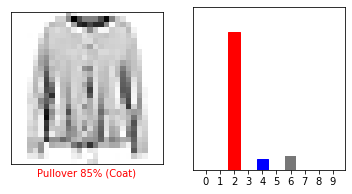

In [ ]:
i = 25
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

##Incorrect predictions can be feteched with:

In [ ]:
tempList = []
for i in range(len(test_labels)):
    if (np.argmax(predictions[i]) != test_labels[i]):
        tempList.append(i)

        tempList = tempList[:100]


## Plotting Incorrectly Classified Images

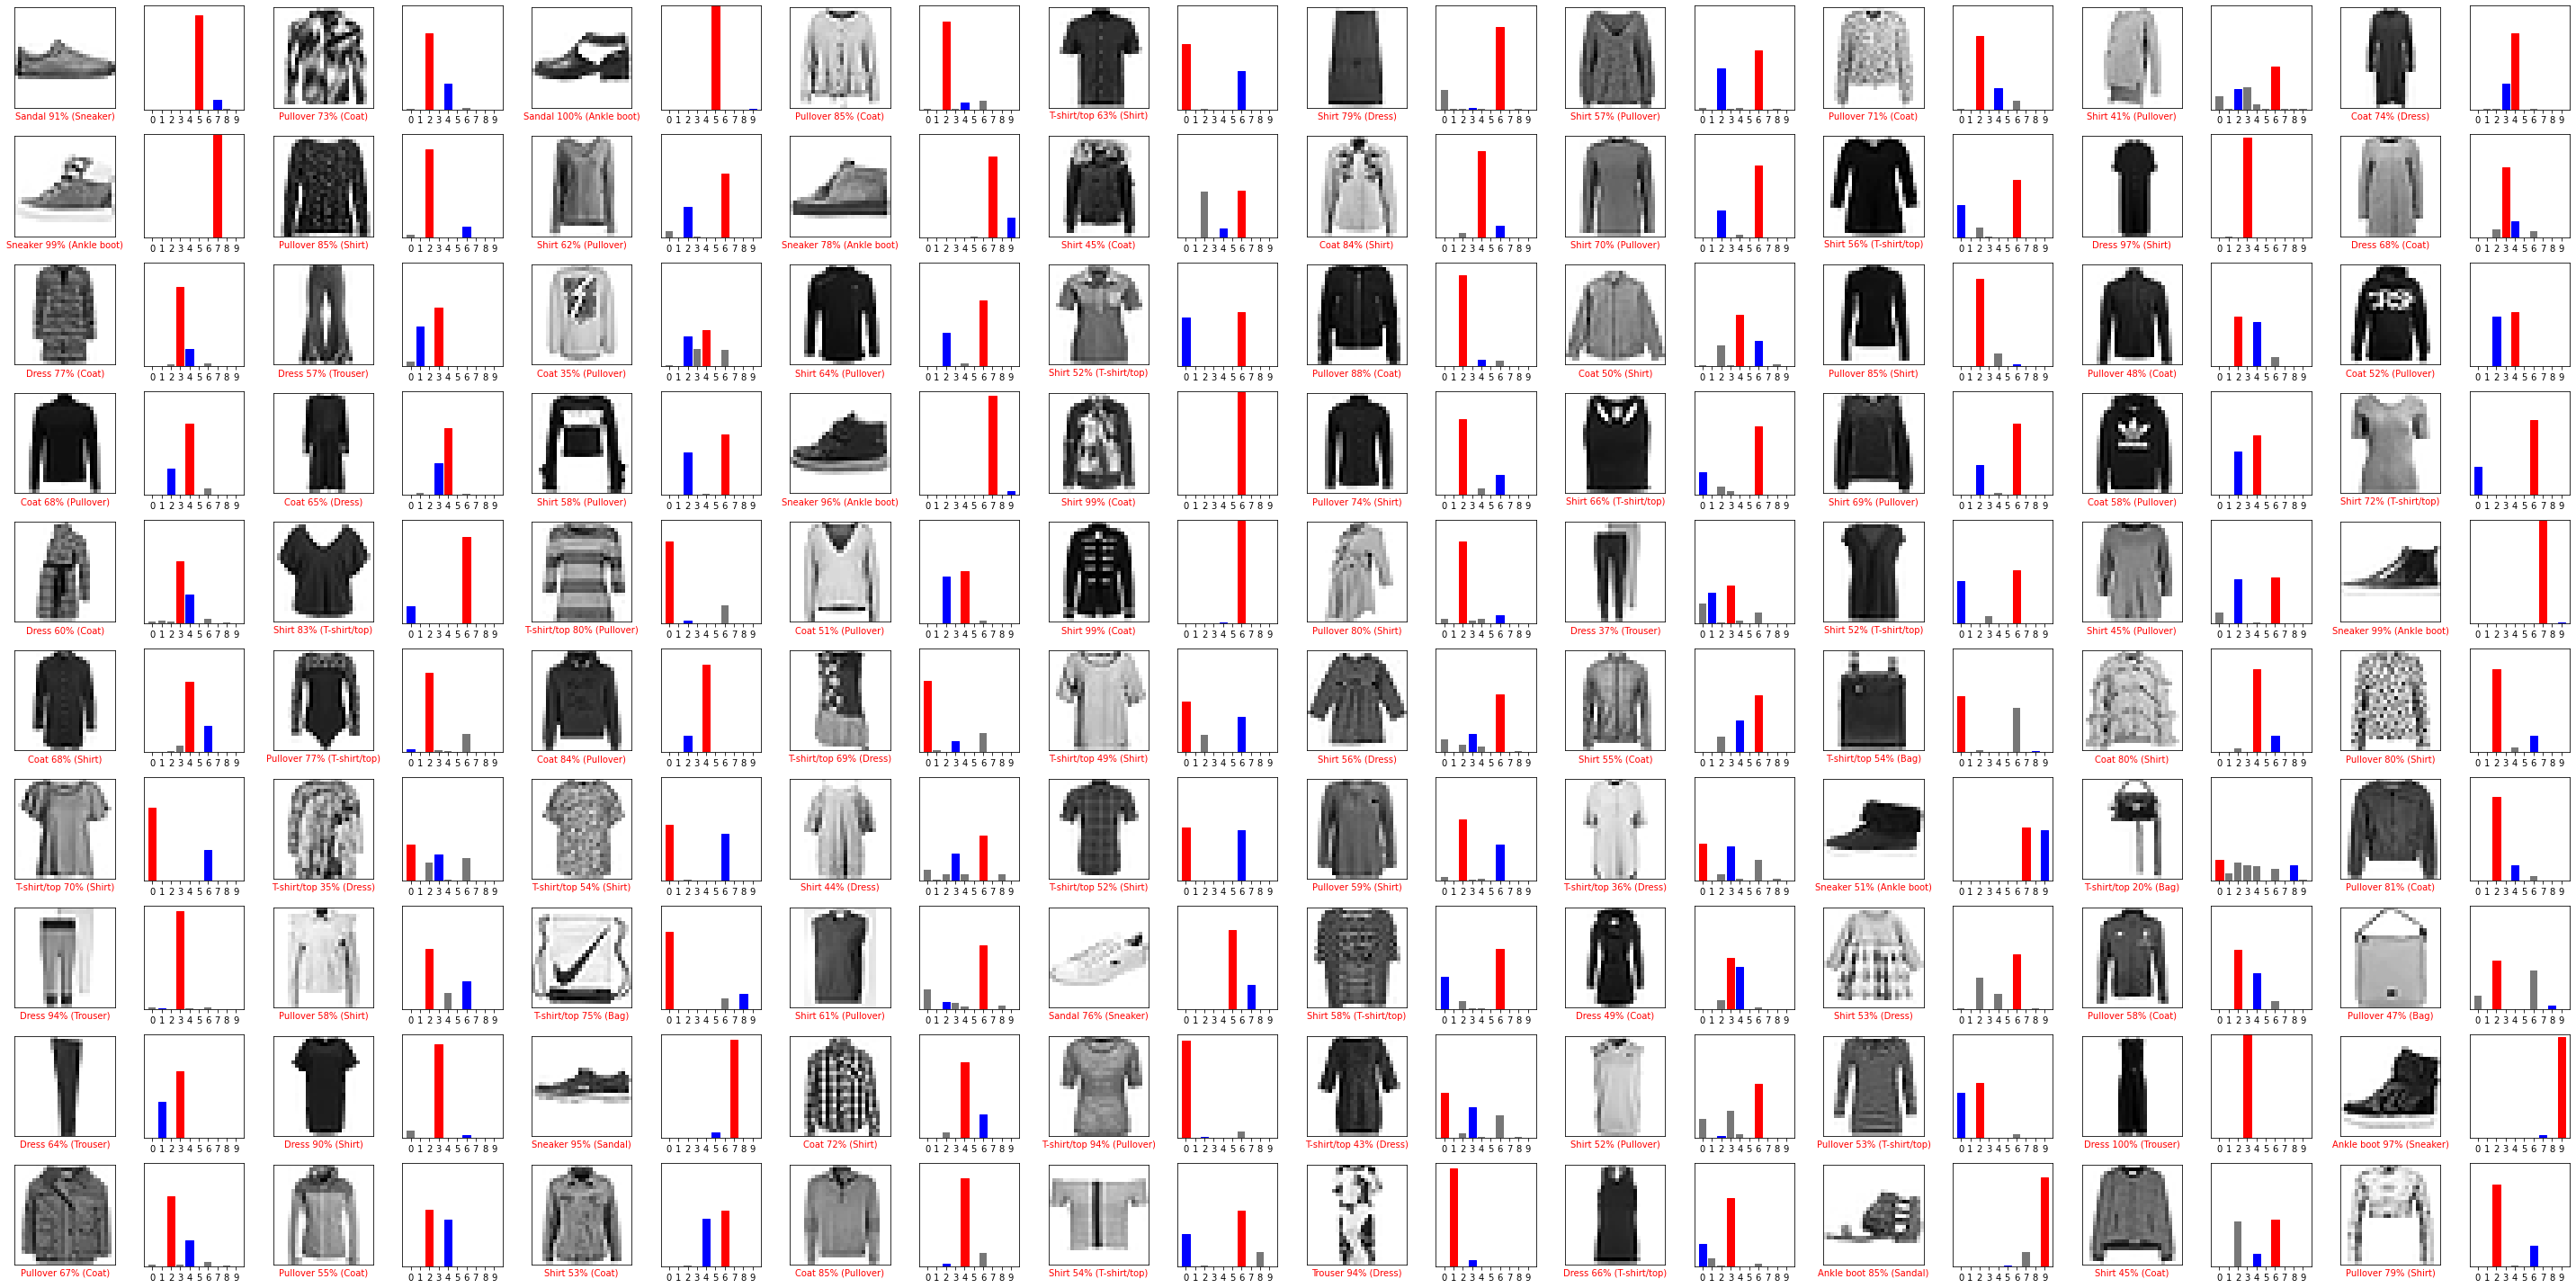

In [ ]:
num_rows = 10
num_cols = 10
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(tempList[i], predictions[tempList[i]], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(tempList[i], predictions[tempList[i]], test_labels)
plt.tight_layout()
plt.show()

**NOTE**: Here, we illustrate all incorrectly classified images. To depict a systemic trend with respect to incorrect classification, it can be said that the model identifies the various types of clothes incorrectly, as they share silhouettes, curvatures, proportions and are rather similar looking in build/constitution. This applies to accessories as well. Shoes are misclassified as bags, because of their insignia. 